In [1]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


### Data preparation

In [2]:
X, y = make_regression(n_samples=100, n_features=1, bias=10.0, noise=10.0, random_state=2)
y = np.expand_dims(y, axis=1)

print(X.shape)
print(y.shape)

(100, 1)
(100, 1)


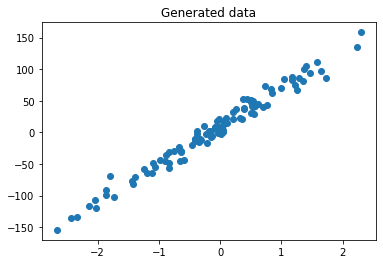

In [3]:
plt.scatter(X, y)
plt.title('Generated data')
plt.show()

### Data split

In [4]:
train_x = X[:80]
test_x = X[80:]

train_y = y[:80]
test_y = y[80:]

In [5]:
train_x.shape

(80, 1)

In [6]:
test_x.shape

(20, 1)

### Defining model

In [7]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, activation='linear', input_shape=(1,)))


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [9]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(loss='mse', optimizer=optimizer, metrics=['mse'])

### Training

In [10]:
model.fit(train_x, train_y, batch_size=10, epochs=100, shuffle=True)

Epoch 1/100
8/8 [==============================] - 0s 826us/step - loss: 3385.8615 - mse: 3385.8615
Epoch 2/100
8/8 [==============================] - 0s 1ms/step - loss: 2466.5323 - mse: 2466.5323
Epoch 3/100
8/8 [==============================] - 0s 736us/step - loss: 1770.1385 - mse: 1770.1384
Epoch 4/100
8/8 [==============================] - 0s 798us/step - loss: 1499.0501 - mse: 1499.0501
Epoch 5/100
8/8 [==============================] - 0s 879us/step - loss: 1092.3212 - mse: 1092.3212
Epoch 6/100
8/8 [==============================] - 0s 828us/step - loss: 818.7365 - mse: 818.7365
Epoch 7/100
8/8 [==============================] - 0s 795us/step - loss: 521.1871 - mse: 521.1871
Epoch 8/100
8/8 [==============================] - 0s 661us/step - loss: 404.1384 - mse: 404.1384
Epoch 9/100
8/8 [==============================] - 0s 817us/step - loss: 382.6028 - mse: 382.6029
Epoch 10/100
8/8 [==============================] - 0s 1ms/step - loss: 267.8283 - mse: 267.8283
Epoch 11/100


8/8 [==============================] - 0s 829us/step - loss: 78.7143 - mse: 78.7143
Epoch 86/100
8/8 [==============================] - 0s 1ms/step - loss: 84.2685 - mse: 84.2685
Epoch 87/100
8/8 [==============================] - 0s 1ms/step - loss: 85.7464 - mse: 85.7464
Epoch 88/100
8/8 [==============================] - 0s 1ms/step - loss: 96.6873 - mse: 96.6873
Epoch 89/100
8/8 [==============================] - 0s 948us/step - loss: 81.4329 - mse: 81.4329
Epoch 90/100
8/8 [==============================] - 0s 1ms/step - loss: 82.1834 - mse: 82.1834
Epoch 91/100
8/8 [==============================] - 0s 1ms/step - loss: 75.7005 - mse: 75.7005
Epoch 92/100
8/8 [==============================] - 0s 1ms/step - loss: 97.7028 - mse: 97.7028
Epoch 93/100
8/8 [==============================] - 0s 987us/step - loss: 91.5140 - mse: 91.5140
Epoch 94/100
8/8 [==============================] - 0s 1ms/step - loss: 69.3667 - mse: 69.3667
Epoch 95/100
8/8 [==============================] - 0s 1m

### Test

In [11]:
y_pred = model.predict(test_x)

Text(0.5, 1.0, 'Model test')

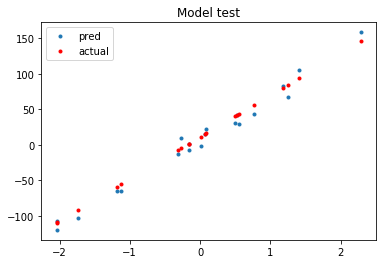

In [14]:
plt.plot(test_x, test_y,'.')
plt.plot(test_x, y_pred,'r.')
plt.legend(['pred', 'actual'])
plt.title('Model test')

# References

Simple Linear Regression with Tensorflow 2.0, https://ayoteralab.tistory.com/entry/Tensorflow-20-05-Simple-Linear-Regression-3 or https://archive.is/ya44R